In [1]:
%cd "/rdma/vast-rdma/user/valmiki/bioplnn"

/rdma/vast-rdma/user/valmiki/bioplnn


In [2]:
import matplotlib.pyplot as plt
from addict import Dict as AttrDict
from hydra import compose, initialize
from omegaconf import OmegaConf
from torchvision.transforms.functional import to_pil_image

from bioplnn.utils import get_correlated_dots_dataloaders, without_keys

In [3]:
with initialize(version_base=None, config_path="configs", job_name="testing"):
    config = compose(
        config_name="config", overrides=["data=corrdots", "model=e1l"]
    )
config = OmegaConf.to_container(config, resolve=True)
config = AttrDict(config)

train_loader, val_loader = get_correlated_dots_dataloaders(
    **without_keys(config.data, "dataset")
)

/om2/user/valmiki/miniconda/envs/pytorch/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
x, label = next(iter(train_loader))

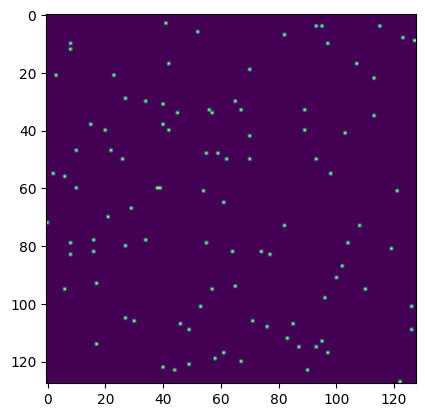

In [5]:
plt.imshow(x[0, 0].squeeze())
plt.show()

In [6]:
imgs = [to_pil_image(f) for f in list(x[0].squeeze().numpy())]

# extract first image from list
img = imgs[0]

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img.save(
    fp="correlated_dots.gif",
    format="GIF",
    append_images=imgs[1:],
    save_all=True,
    duration=200,
    loop=0,
)